In [1]:
import os
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('..')
from attention.utils.paths import path_figures, path_training

In [5]:
def absolute_change(x):
    return np.array([(x[i-1]-x[i]) for i in range(1, len(x))])

def relative_change(x):
    return np.array([(x[i-1]-x[i])/x[i-1] for i in range(1, len(x))])

def plot_training(type_category_set, version_weights, name, mode='relative', threshold=0.001):
    identifier = f'{type_category_set}_v{version_weights}'
    filenames = sorted([f for f in os.listdir(path_training) if identifier in f])
    if type_category_set == 'size':
        filenames = filenames[1:]
    num_category_sets = len(filenames)
    
    num_cols = 3
    width_ratio = 10
    shape_fig = (int(np.ceil(num_category_sets/num_cols)), num_cols)
    fig, ax = plt.subplots(*shape_fig, figsize=(4*num_cols, 0.8*num_category_sets))
    
    for i, filename in enumerate(filenames):
        df = pd.read_csv(path_training/filename, index_col=0)
        rowcol = np.unravel_index(i, shape_fig)
        ax[rowcol].axhline(y=threshold, xmin=0, xmax=300, c='r', ls=':', label='threshold')
        if mode == 'relative':
            change = relative_change(df['val_loss'])
        elif mode == 'absolute':
            change = absolute_change(df['val_loss'])
        num_points_after_threshold = np.count_nonzero(change <= threshold)
        print('Number of points after threshold:', num_points_after_threshold)
        print('Final value:', change[-1])
        ax[rowcol].plot(change, 'b')
        if num_points_after_threshold > 0:
            ind_threshold = np.flatnonzero(change <= threshold)[0]
            ax[rowcol].plot(ind_threshold, change[ind_threshold], 'ok')
        ax[rowcol].set_title(f'{name} category set {i+1}')
        ax[rowcol].set_xlim((0, 300))
        ax[rowcol].set_xticks((0, 300))
        ax[rowcol].set_ylabel(f'Change ({mode}) in val loss')
        ax[rowcol].set_xlabel('Epoch', labelpad=-10)
        ax[rowcol].legend()
            
    plt.tight_layout()
#     plt.savefig(f'/Users/fbickfordsmith/Downloads/{identifier}_loss_{mode}.pdf')
    return fig, ax

Number of points after threshold: 26
Final value: 0.000467591089299604
Number of points after threshold: 10
Final value: 0.00048590058075164495
Number of points after threshold: 35
Final value: 0.00040127717814438646
Number of points after threshold: 20
Final value: 0.0004578752187105963
Number of points after threshold: 20
Final value: 0.00046474214565421355
Number of points after threshold: 14
Final value: 0.00048025289064542267


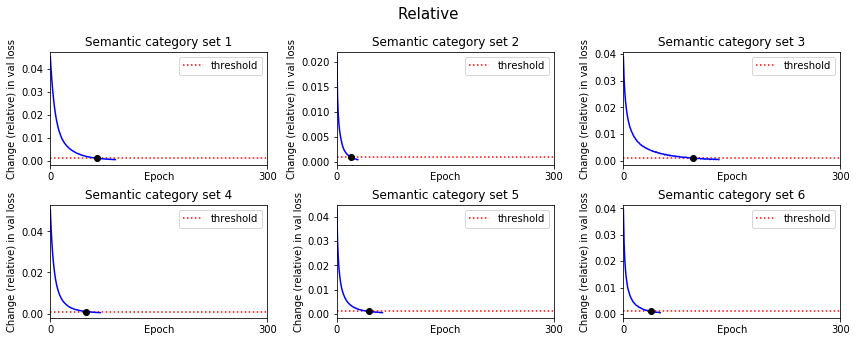

In [6]:
fig, ax = plot_training('sem', 9, 'Semantic', mode='relative', threshold=0.001)
plt.subplots_adjust(top=0.85)
fig.suptitle('Relative', size=15);
# plt.savefig('/Users/fbickfordsmith/Downloads/loss_relative.pdf')

Number of points after threshold: 0
Final value: 0.00036068916105569393
Number of points after threshold: 0
Final value: 0.0004849572426337545
Number of points after threshold: 0
Final value: 0.00019527507956912382
Number of points after threshold: 0
Final value: 0.00039006941641894777
Number of points after threshold: 0
Final value: 0.0002574772949129889
Number of points after threshold: 0
Final value: 0.0001795307368437915


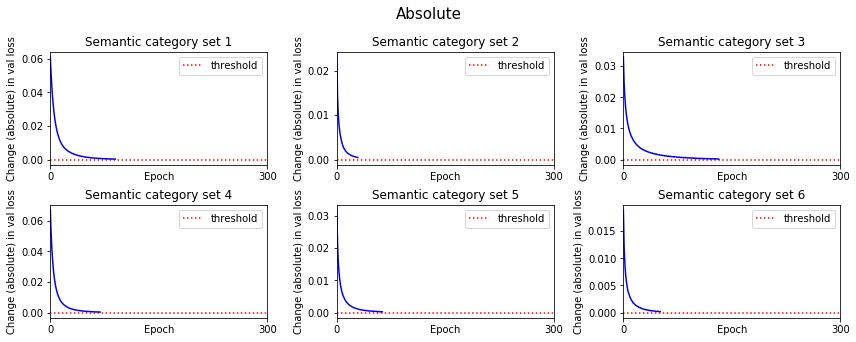

In [7]:
fig, ax = plot_training('sem', 9, 'Semantic', mode='absolute', threshold=0)
plt.subplots_adjust(top=0.85)
fig.suptitle('Absolute', size=15);
# plt.savefig('/Users/fbickfordsmith/Downloads/loss_absolute.pdf')